In [35]:
import os
os.chdir('C:/Users/ASUS/Desktop/Data Science/portfolio projects/Time Series Analysis')

In [36]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('C:/Users/ASUS/Desktop/Data Science/portfolio projects/Time Series Analysis/Data/Train Data.csv')
test_data=pd.read_csv('C:/Users/ASUS/Desktop/Data Science/portfolio projects/Time Series Analysis/Data/Test Data.csv')

In [37]:
import matplotlib.pyplot as plt
import matplotlib.pylab as py
from datetime import datetime
%matplotlib inline
from pandas import Series        # To work on series
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 30,12


In [38]:
#Creating train and test set 
#Index 10392 marks the end of October 2013 
train=train_data[0:10392] 
test=train_data[10392:]

In [39]:
#Aggregating the dataset at daily level
train_data.Timestamp = pd.to_datetime(train_data.Datetime,format='%d-%m-%Y %H:%M') 
train_data.index = train_data.Timestamp 
train_data = train_data.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
train = train.resample('D').mean() 
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 
test = test.resample('D').mean()

test_data.Timestamp = pd.to_datetime(test_data.Datetime,format='%d-%m-%Y %H:%M') 
test_data.index = test_data.Timestamp 
test_data = test_data.resample('D').mean()

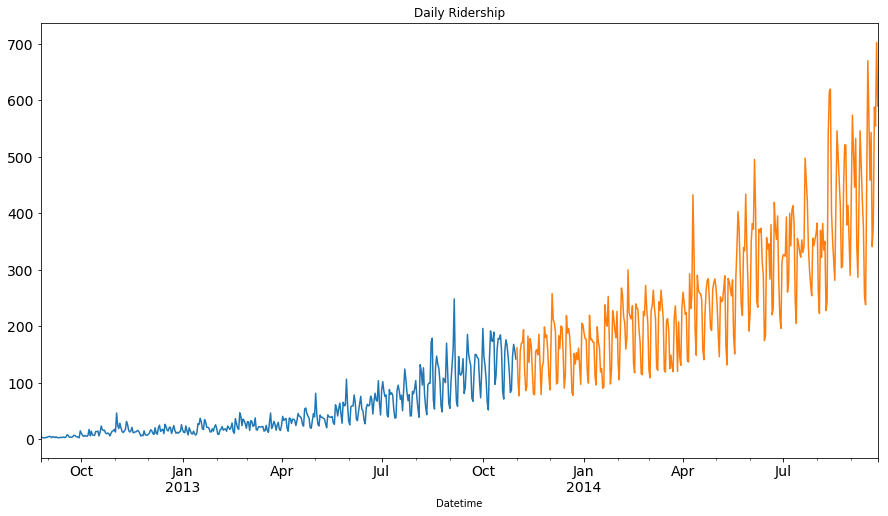

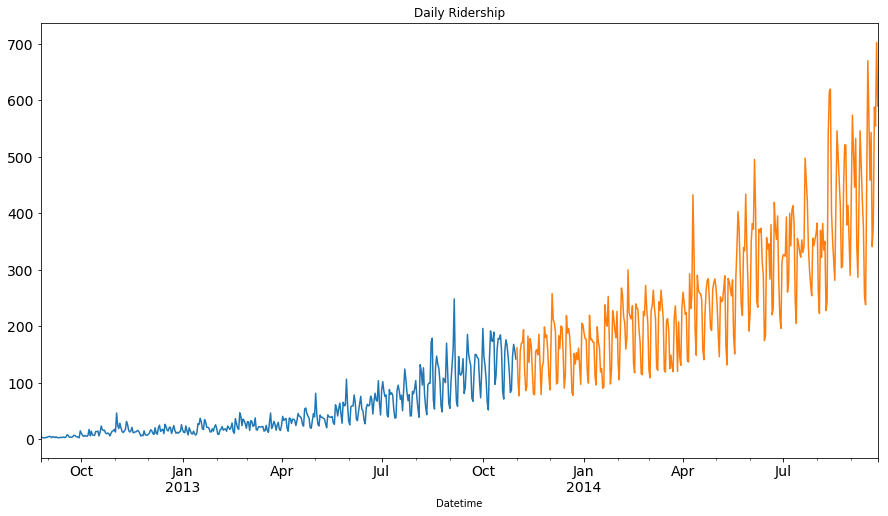

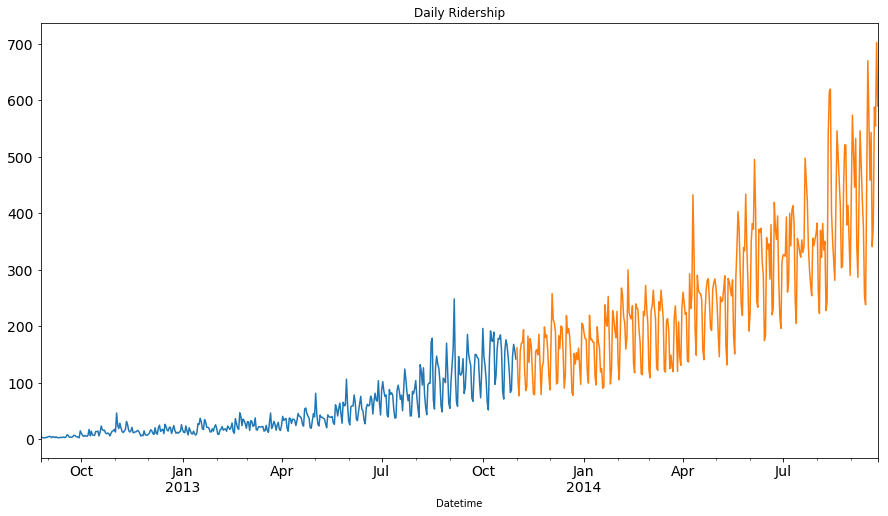

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

In [40]:
#Plotting data
train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
test.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)
plt.show()
plt.savefig('time-series.png')

In [41]:
from statsmodels.tsa.api import ExponentialSmoothing

# Naive Approach forecasting

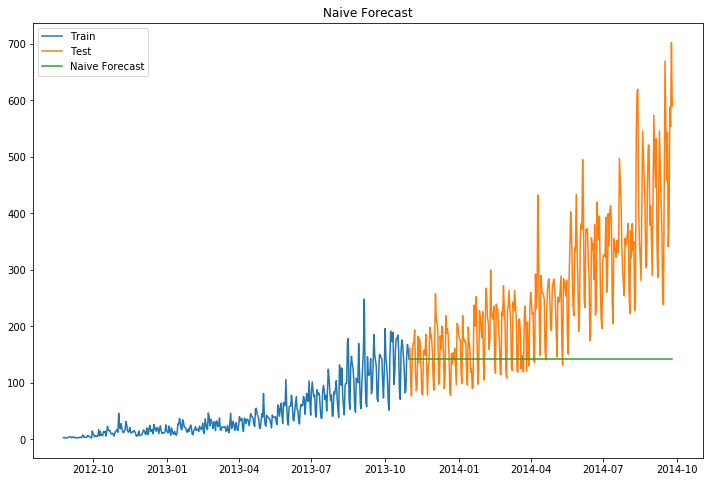

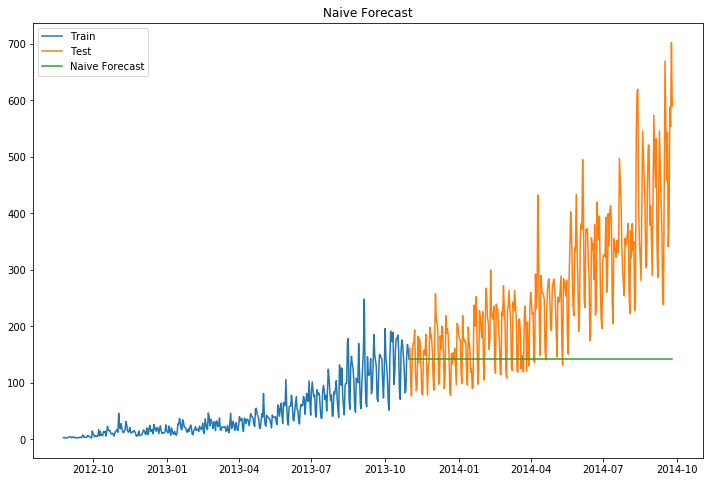

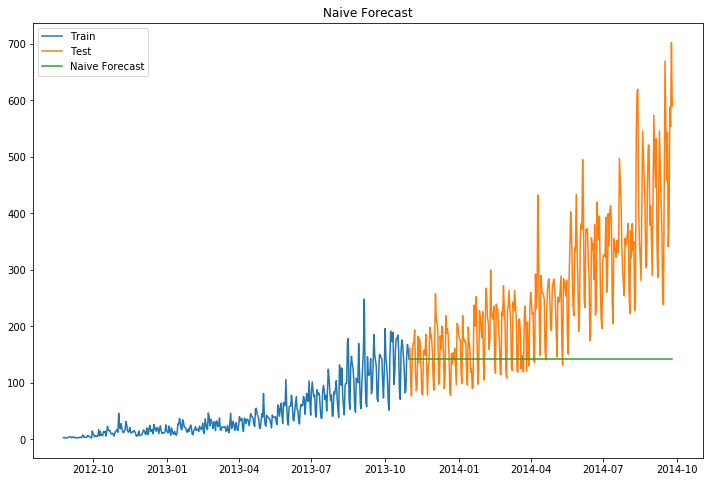

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

In [42]:
dd= np.asarray(train.Count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

plt.savefig('time-series-naive-approach.png')

In [43]:
#Check accuracy of model
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.Count, y_hat.naive))
print(rms)

168.10065982822383
168.10065982822383
168.10065982822383


We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. Now we will look at another technique and try to improve our score.

#  Simple Average

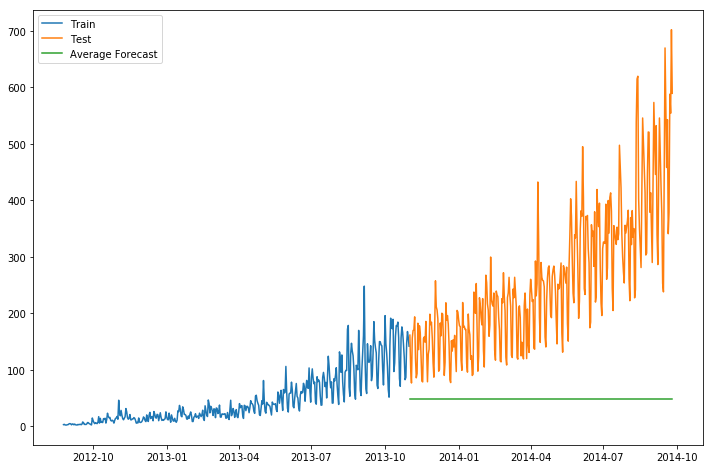

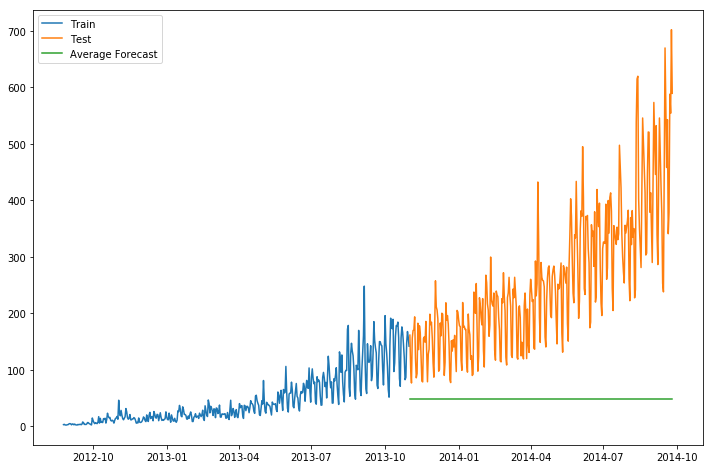

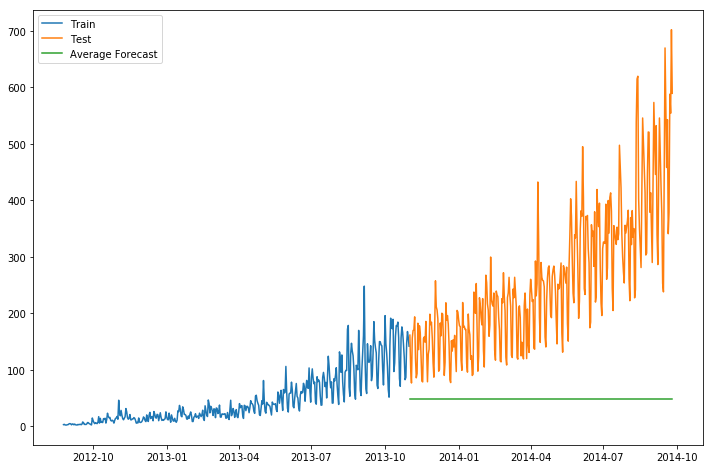

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

In [44]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Count'].mean()
plt.figure(figsize=(12,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()
plt.savefig("time-series-average-forecast.png")

In [45]:
# Model Accuracy
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.avg_forecast))
print("RMS:",rms)



RMS: 242.4970488095692
RMS: 242.4970488095692
RMS: 242.4970488095692


We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not

# Moving Average

Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values. Thus, for all i > p




A moving average can actually be quite effective, especially if you pick the right p for the series.

 

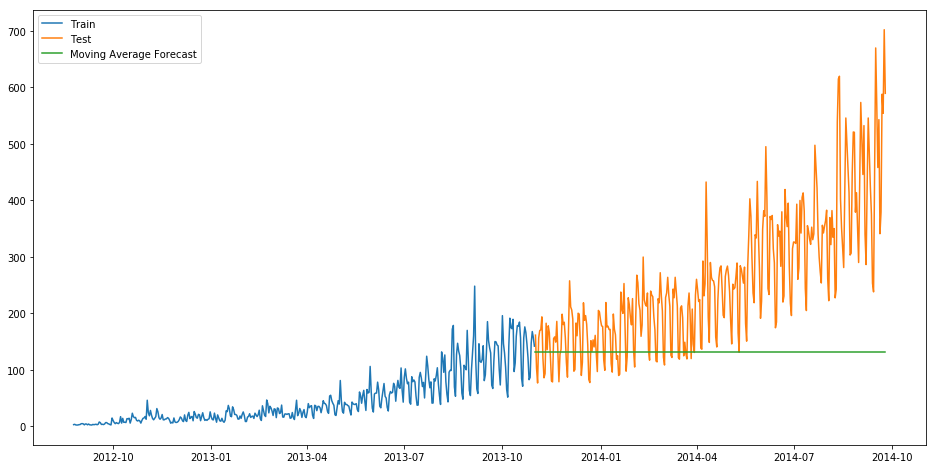

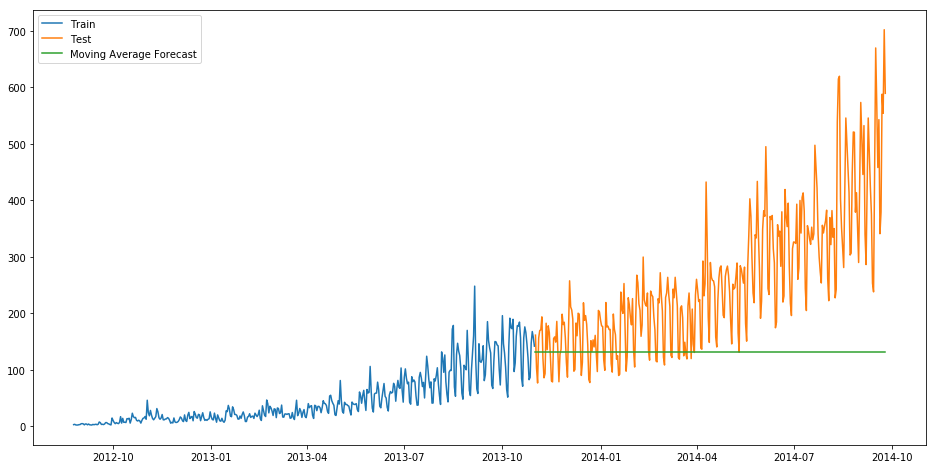

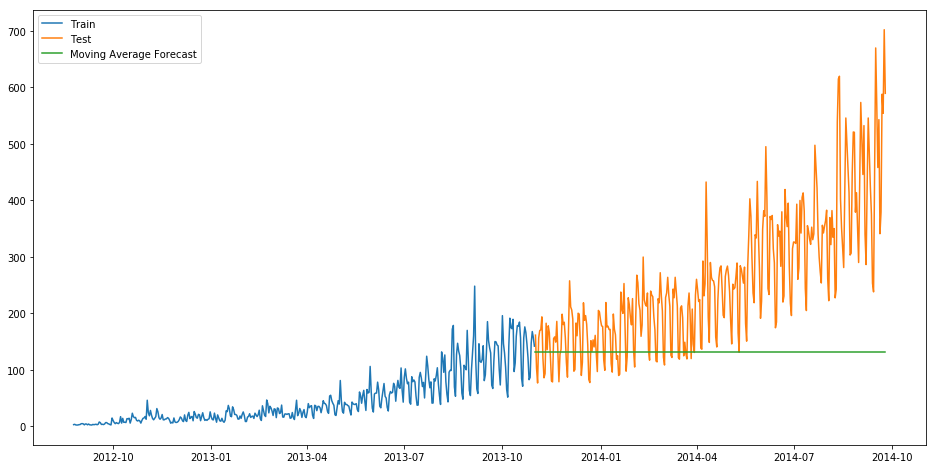

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

In [46]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Count'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()
plt.savefig('time-series-moving-average.png')

In [47]:
#model performance
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.moving_avg_forecast))
print("RMS:",rms)


RMS: 175.3362295623058
RMS: 175.3362295623058
RMS: 175.3362295623058


An advancement over Moving average method is Weighted moving average method. In the Moving average method as seen above, we equally weigh the past ‘n’ observations. But we might encounter situations where each of the observation from the past ‘n’ impacts the forecast in a different way. Such a technique which weighs the past observations differently is called Weighted Moving Average technique.

# Simple Exponential Smoothing

After we have understood the above methods, we can note that both Simple average and Weighted moving average lie on completely opposite ends. We would need something between these two extremes approaches which takes into account all the data while weighing the data points differently. For example it may be sensible to attach larger weights to more recent observations than to observations from the distant past. The technique which works on this principle is called Simple exponential smoothing. Exponential smoothing is a rule of thumb technique for smoothing time series data using the exponential window function. Whereas in the simple moving average the past observations are weighted equally, exponential functions are used to assign exponentially decreasing weights over time. It is an easily learned and easily applied procedure for making some determination based on prior assumptions by the user, such as seasonality. Exponential smoothing is often used for analysis of time-series data.

Exponential smoothing is one of many window functions commonly applied to smooth data in signal processing, acting as low-pass filters to remove high-frequency noise. This method is preceded by Poisson's use of recursive exponential window functions in convolutions from the 19th century, as well as Kolmogorov and Zurbenko's use of recursive moving averages from their studies of turbulence in the 1940s.

The raw data sequence is often represented by {\displaystyle \{x_{t}\}}\{x_{t}\} beginning at time {\displaystyle t=0}t=0, and the output of the exponential smoothing algorithm is commonly written as {\displaystyle \{s_{t}\}}\{s_{t}\}, which may be regarded as a best estimate of what the next value of {\displaystyle x}x will be. When the sequence of observations begins at time {\displaystyle t=0}t=0, the simplest form of exponential smoothing is given by the formulas:[1]

{\displaystyle {\begin{aligned}s_{0}&=x_{0}\\s_{t}&=\alpha x_{t}+(1-\alpha )s_{t-1},\ t>0\end{aligned}}}{\begin{aligned}s_{0}&=x_{0}\\s_{t}&=\alpha x_{t}+(1-\alpha )s_{t-1},\ t>0\end{aligned}}

where {\displaystyle \alpha }\alpha  is the smoothing factor, and {\displaystyle 0<\alpha <1}0<\alpha <1.

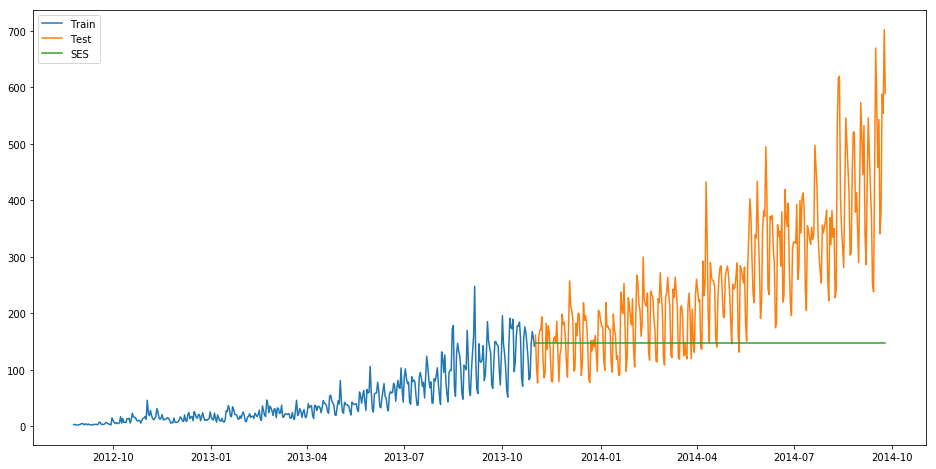

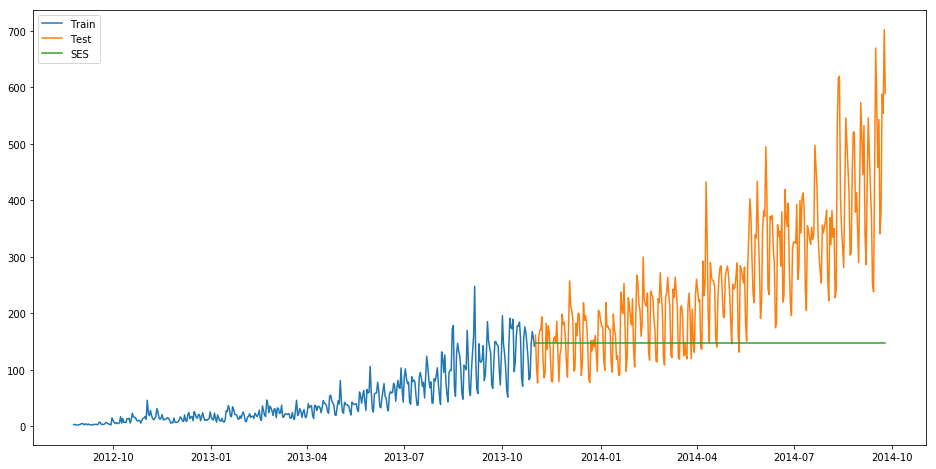

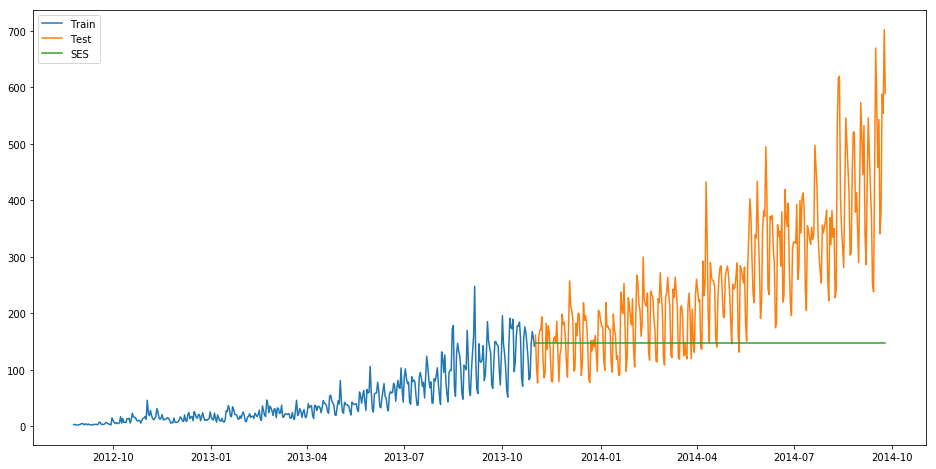

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

In [48]:
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()
plt.savefig('time-series-ExponentialSmoothing')

In [49]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SES))
print("RMS:",rms)

RMS: 164.61063054927618
RMS: 164.61063054927618
RMS: 164.61063054927618


We can see that implementing Simple exponential model with alpha as 0.6 generates a better model till now. We can tune the parameter using the validation set to generate even a better Simple exponential model.

# Holt’s Linear Trend method

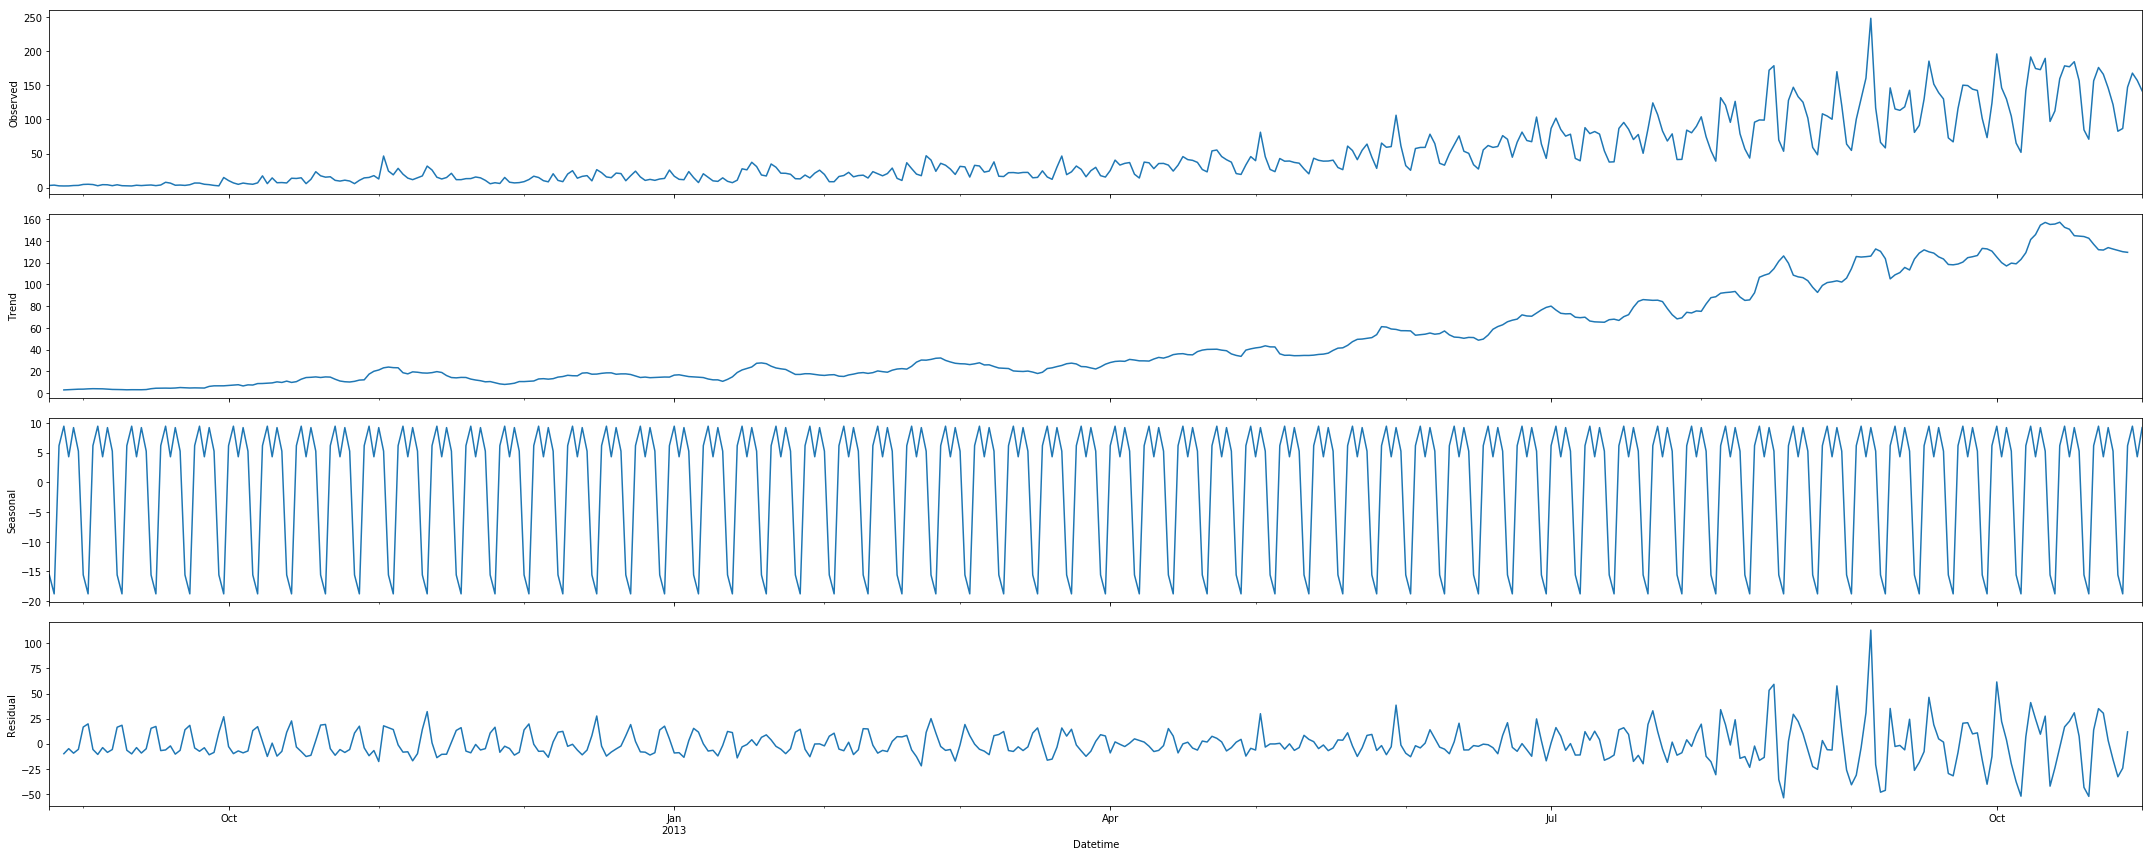

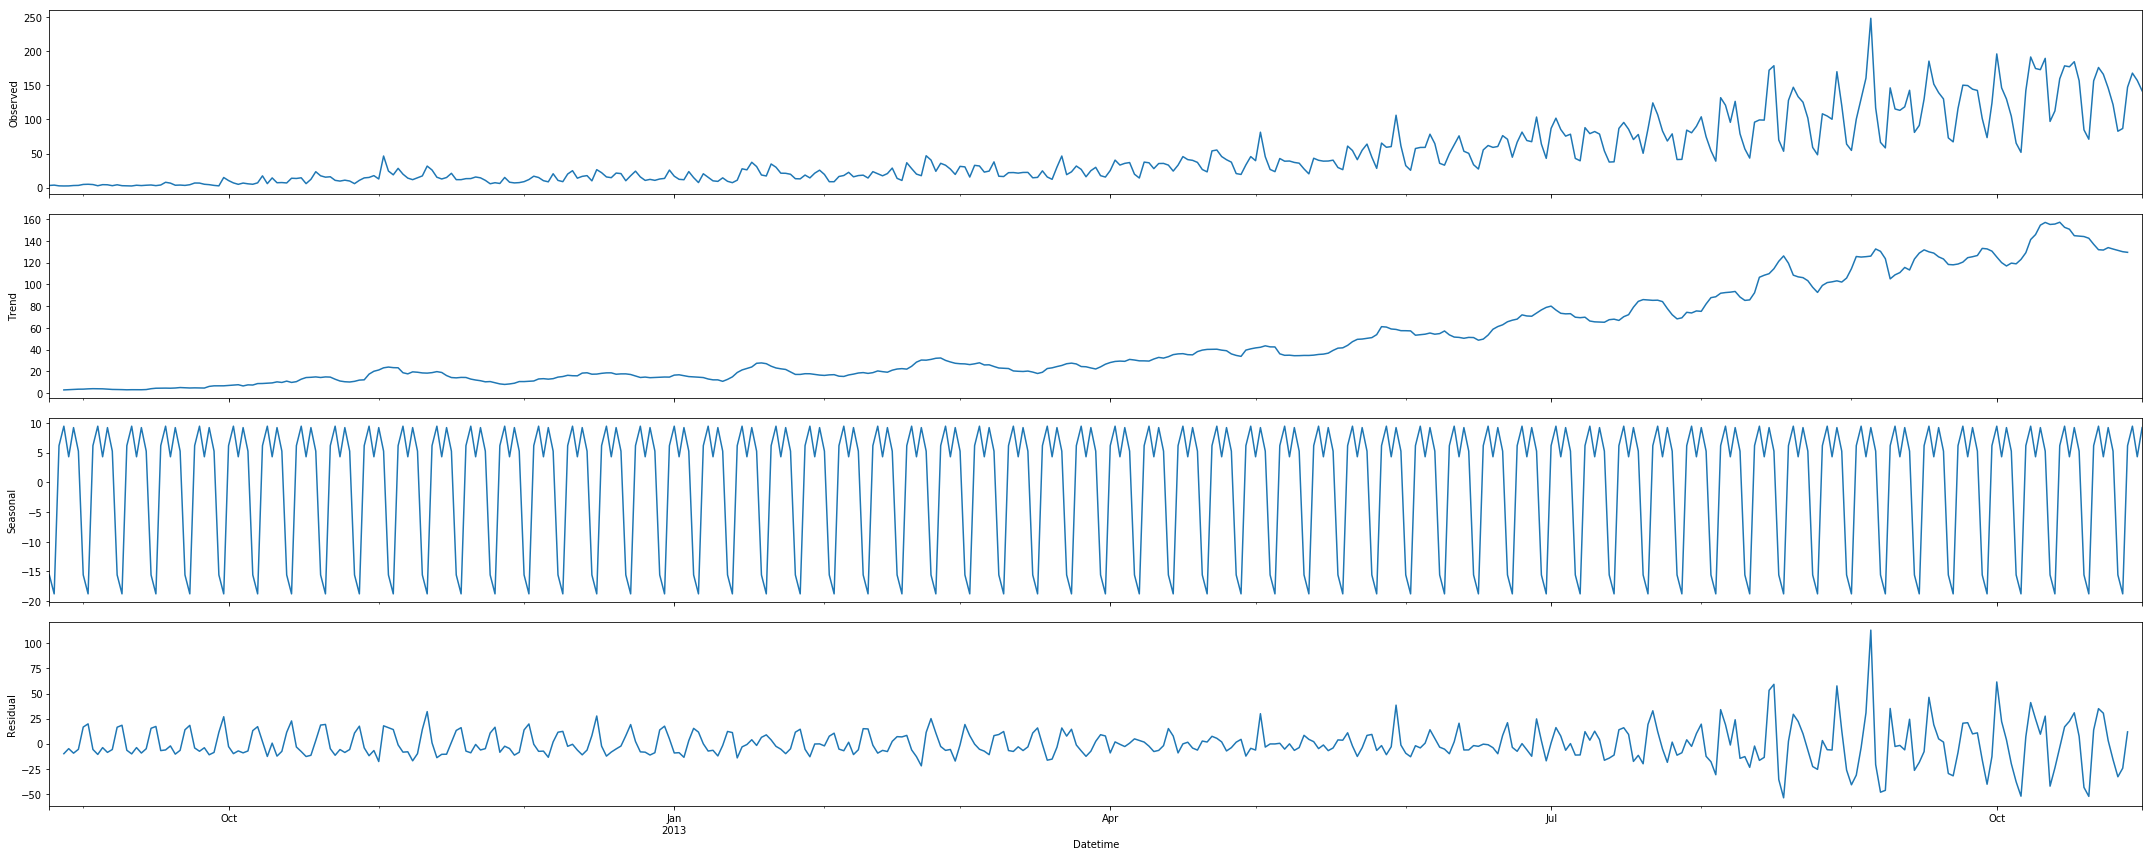

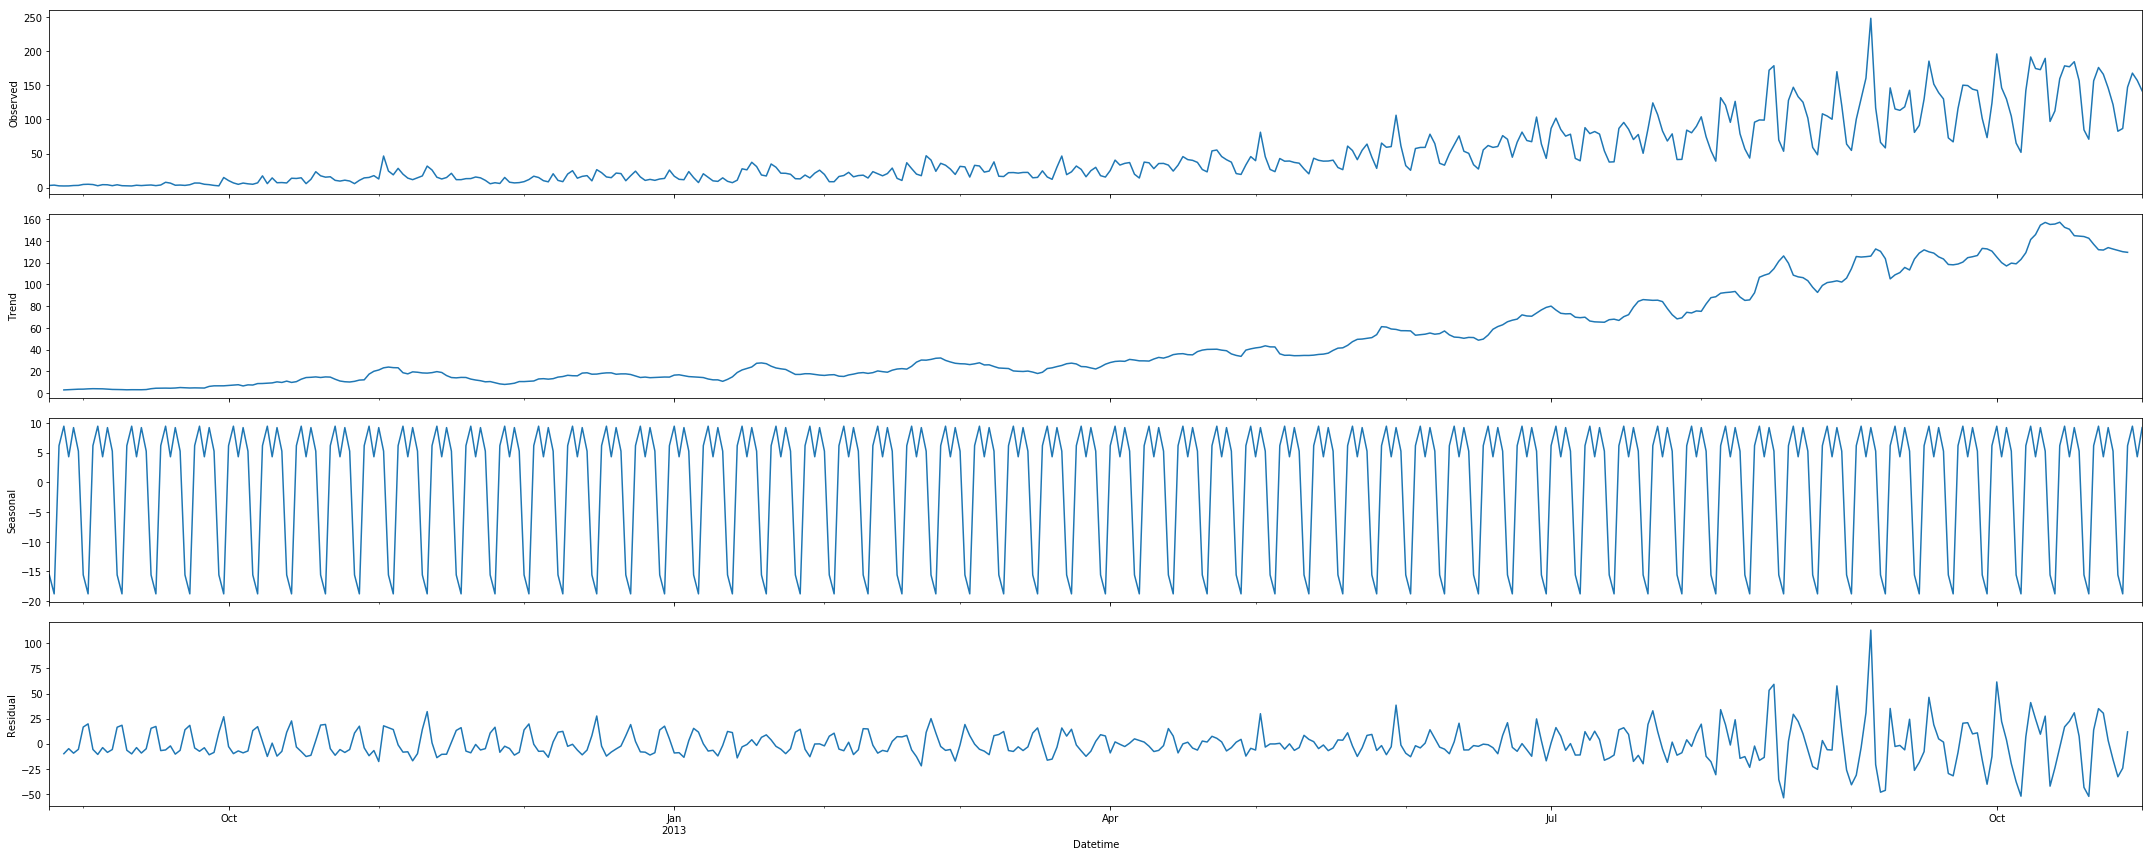

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

In [50]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.Count).plot()
result = sm.tsa.stattools.adfuller(train.Count)
plt.show()
plt.savefig('holt_trends.png')

We can see from the graphs obtained that this dataset follows an increasing trend. Hence we can use Holt’s linear trend to forecast the future prices.

Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ

The values we predicted in the above algorithms are called Level. In the above three equations, you can notice that we have added level and trend to generate the forecast equation.

As with simple exponential smoothing, the level equation here shows that it is a weighted average of observation and the within-sample one-step-ahead forecast The trend equation shows that it is a weighted average of the estimated trend at time t based on ℓ(t)−ℓ(t−1) and b(t−1), the previous estimate of the trend.

We will add these equations to generate Forecast equation. We can also generate a multiplicative forecast equation by multiplying trend and level instead of adding it. When the trend increases or decreases linearly, additive equation is used whereas when the trend increases of decreases exponentially, multiplicative equation is used.Practice shows that multiplicative is a more stable predictor, the additive method however is simpler to understand.

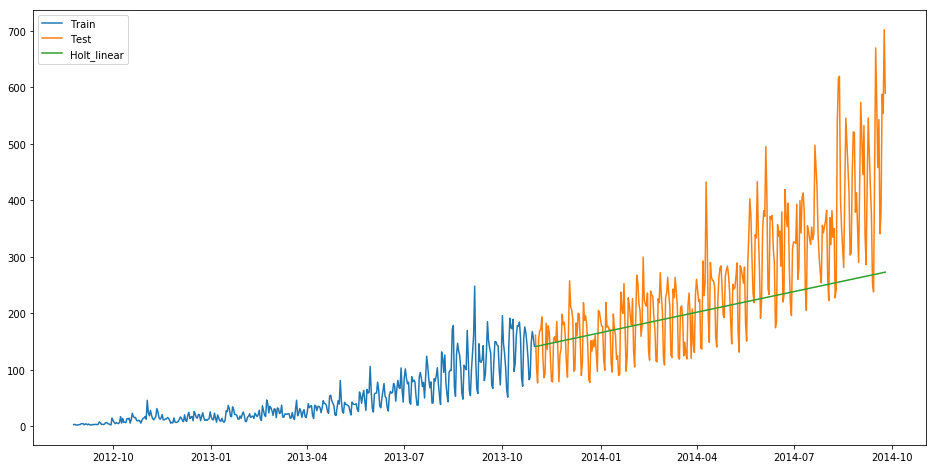

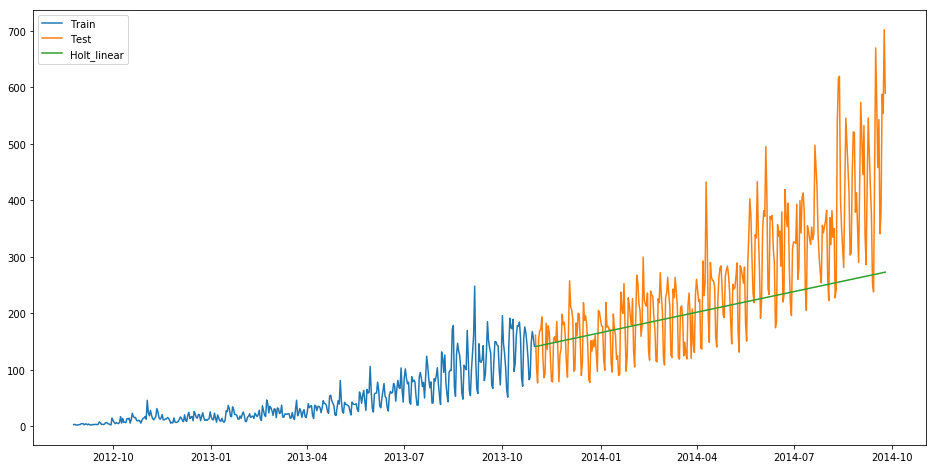

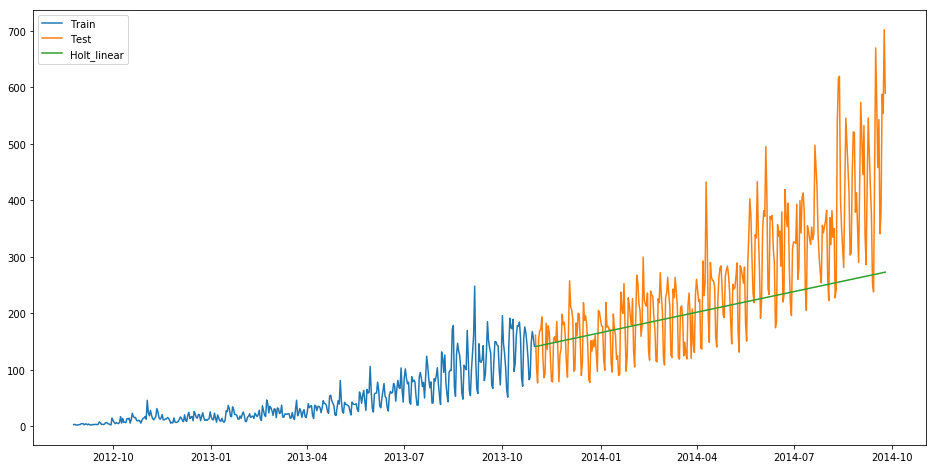

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

In [51]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()
plt.savefig('time_series_holt_prediction.png')

In [52]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_linear))
print("RMS Holt trend:",rms)

RMS Holt trend: 107.23394793380741
RMS Holt trend: 107.23394793380741
RMS Holt trend: 107.23394793380741


We can see that this method maps the trend accurately and hence provides a better solution when compared with above models. We can still tune the parameters to get even a better model.

# Holt-Winters Method

So let’s introduce a new term which will be used in this algorithm. Consider a hotel located on a hill station. It experiences high visits during the summer season whereas the visitors during the rest of the year are comparatively very less. Hence the profit earned by the owner will be far better in summer season than in any other season. This pattern will repeat itself every year. Such a repetition is called Seasonality. Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

In this method also, we can implement both additive and multiplicative technique.  The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.

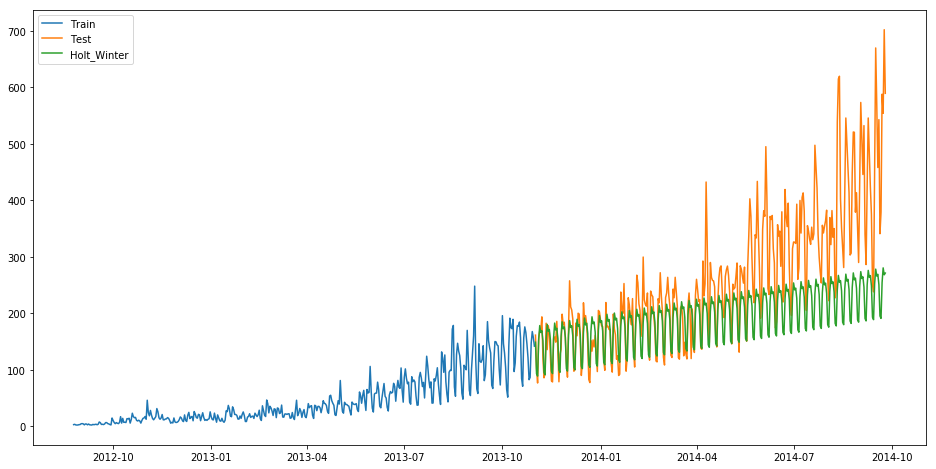

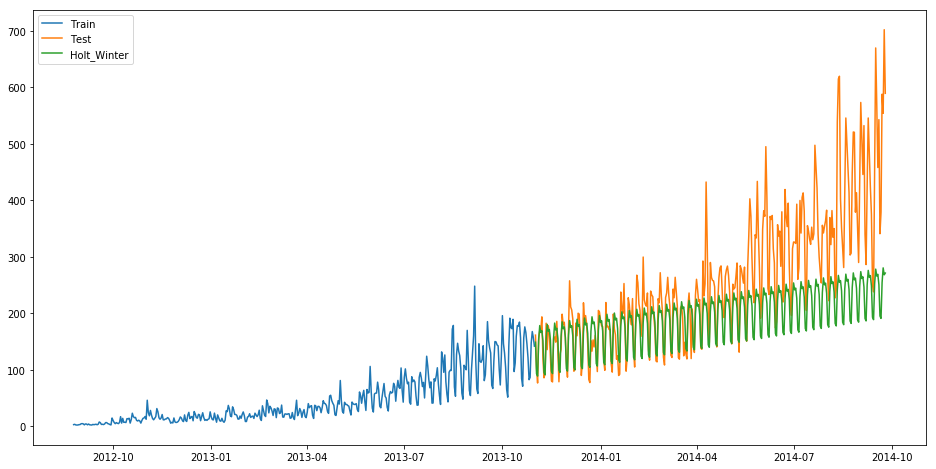

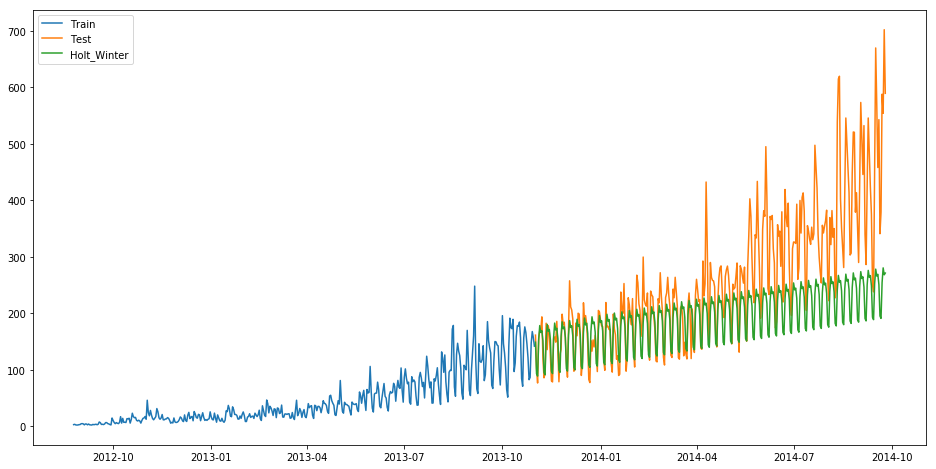

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

<Figure size 2160x864 with 0 Axes>

In [54]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
plt.savefig('Holt_Winter_time_series.png')

In [55]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.Holt_Winter))
print("RMSE Holt Winter:",rms)

RMSE Holt Winter: 108.04059918591852
RMSE Holt Winter: 108.04059918591852
RMSE Holt Winter: 108.04059918591852


We can see from the graph that mapping correct trend and seasonality provides a far better solution. We chose seasonal_period = 7 as data repeats itself weekly. Other parameters can be tuned as per the dataset. I have used default parameters while building this model. You can tune the parameters to achieve a better model.

# ARIMA

Another common Time series model that is very popular among the Data scientists is ARIMA. It stand for Autoregressive Integrated Moving average. While exponential smoothing models were based on a description of trend and seasonality in the data, ARIMA models aim to describe the correlations in the data with each other. An improvement over ARIMA is Seasonal ARIMA. It takes into account the seasonality of dataset just like Holt’ Winter method. 

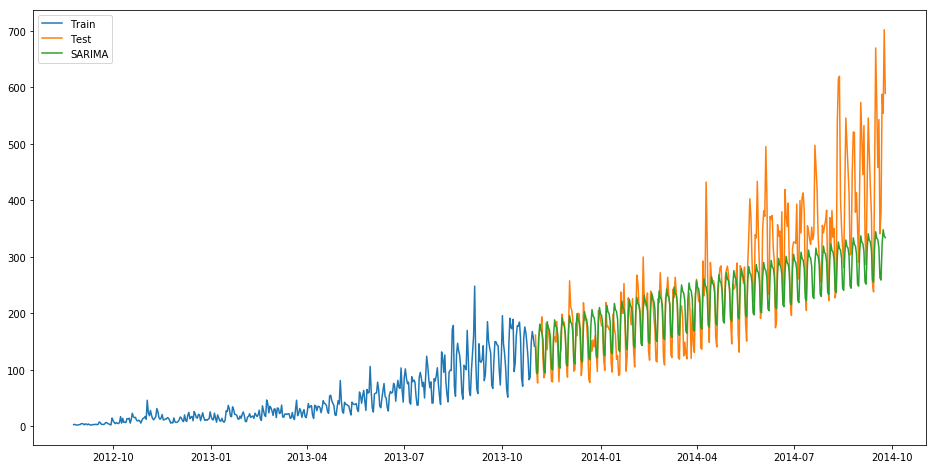

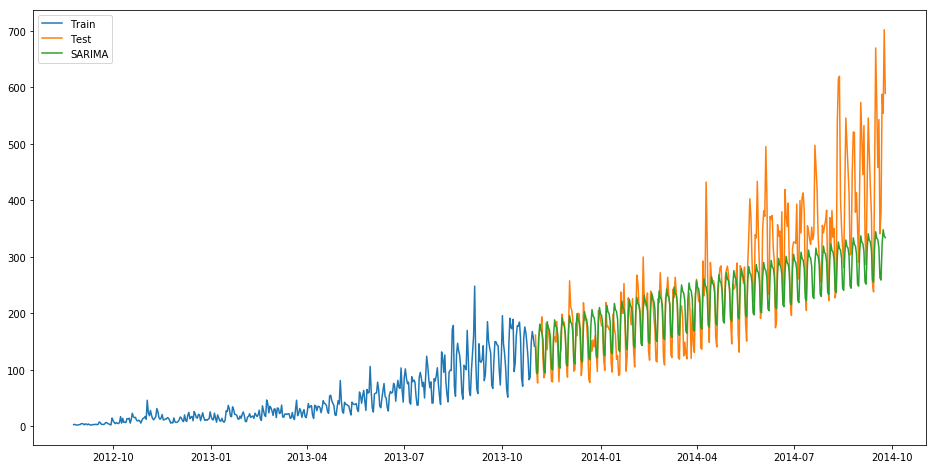

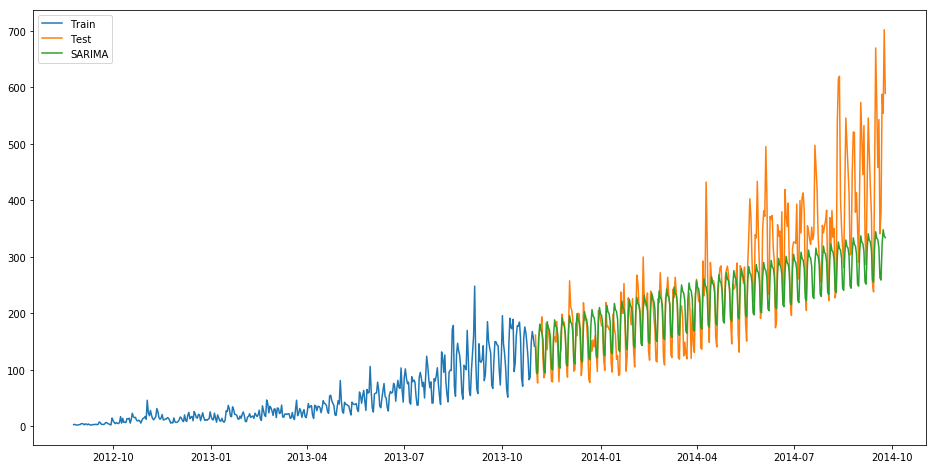

In [70]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start="2013-11-1", end="2014-10-31", dynamic=True)
plt.figure(figsize=(16,8))
plt.plot( train['Count'], label='Train')
plt.plot(test['Count'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [72]:
rms = sqrt(mean_squared_error(test.Count, y_hat_avg.SARIMA))
print("RMSE ARIMA:",rms)

RMSE ARIMA: 79.40865411728998
RMSE ARIMA: 79.40865411728998
RMSE ARIMA: 79.40865411728998


We can see that using Seasonal ARIMA generates a similar solution as of Holt’s Winter. We chose the parameters as per the ACF and PACF graphs. You can learn more about them from the links provided above. If you face any difficulty finding the parameters of ARIMA model, you can use auto.arima implemented in R language